<a href="https://colab.research.google.com/github/Prachi319/Gold-Price-prediction-/blob/main/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and pre processing

In [ ]:
gold=pd.read_csv("/content/gld_price_data (1).csv")
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print last five rows
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and cols
gold.shape

(2290, 6)

In [ ]:
#statistical information
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#checking datatype
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking missing values
gold.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


Correlation
poitive Correlation
negative Correlation

In [ ]:
from datetime import datetime
gold["Date"]=pd.to_datetime(gold["Date"])
correlation=gold.corr()

<Axes: >

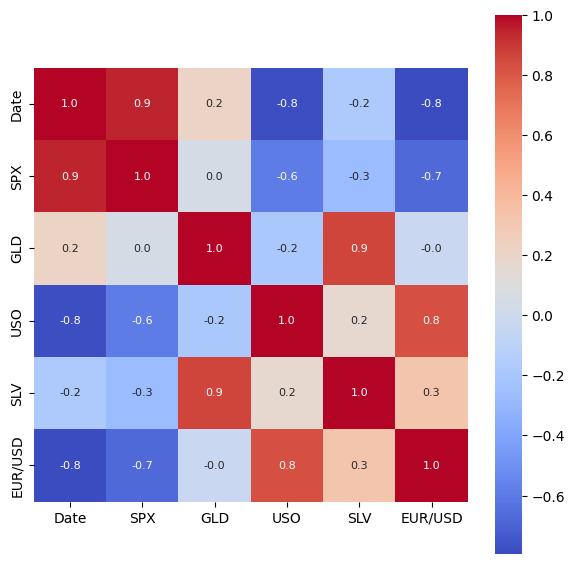

In [ ]:
#plotting heatmap
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

In [ ]:
#correlation vlaues of GLD
print(correlation["GLD"])


Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-3bd3ce764645>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold["GLD"],color="red")


<Axes: xlabel='GLD', ylabel='Density'>

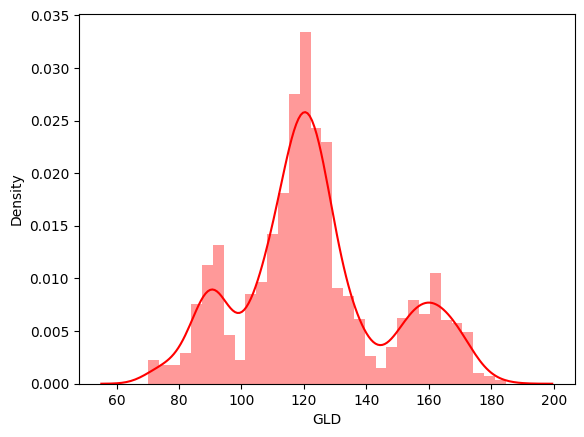

In [ ]:
#Check the distribution of the gld price
sns.distplot(gold["GLD"],color="red")

In [ ]:
x=gold.drop(["Date","GLD"],axis=1)
y=gold["GLD"]

In [ ]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Train test split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)
print(x_test)

(2290, 4) (1832, 4) (458, 4)
              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090000  33.220001  1.327492
1693  1952.290039  14.930000  13.990000  1.129089
2054  2349.010010  11.060000  17.430000  1.064453
658   1273.849976  37.680000  28.420000  1.315686
376   1057.579956  35.959999  17.250000  1.478131

[458 rows x 4 columns]


In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
prediction_test = regressor.predict(x_test)
accuracy=metrics.r2_score(y_test,prediction_test)
print ("R square error:",accuracy)

R square error: 0.9894264939985521


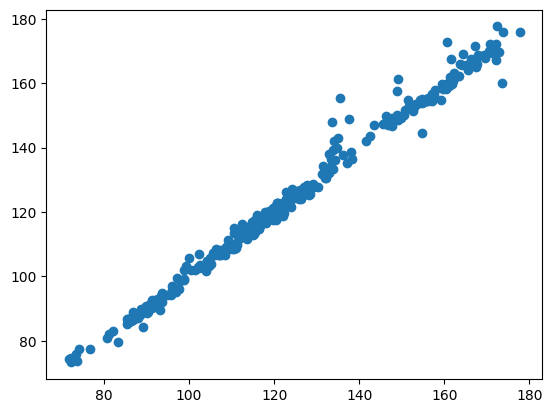

In [ ]:
plt.scatter(y_test,prediction_test)

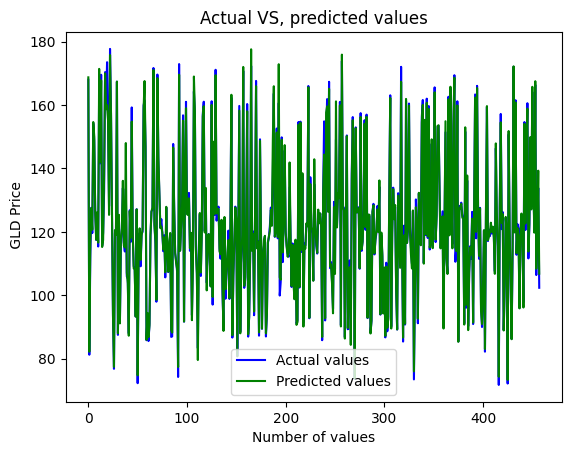

In [ ]:
y_test=list(y_test)
plt.plot(y_test,color="blue",label="Actual values")
plt.plot(prediction_test,color="green",label="Predicted values")
plt.title("Actual VS, predicted values")
plt.xlabel("Number of values")
plt.ylabel(" GLD Price")
plt.legend()
plt.show()

Prediction model


In [ ]:
import random
import numpy as np

# Convert test data to array (if not already)
x_test = np.array(x_test)

y_test = np.array(y_test)


# Step 1: Pick a random index from the test set
random_index = random.randint(0, len(x_test) - 1)

# Step 2: Get the test input and actual output
test_input = x_test[random_index].reshape(1, -1)   # Reshape for prediction
true_value = y_test[random_index]

# Step 3: Predict using your trained model (regressor)
predicted_value = regressor.predict(test_input)

# Step 4: Print and compare
print(f"Random Index: {random_index}")
print(f"Predicted Gold Price: {predicted_value[0]}")
print(f"Actual Gold Price: {true_value}")


Random Index: 126
Predicted Gold Price: 99.45410044000002
Actual Gold Price: 97.050003


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
